## A Summary of Visualization on the "Titanic" Dataset using _Matplotlib_ and _Seaborn_

### Author: Junyuan Zheng
### Email: jz3036@cumc.columbia.edu

### Dataset: "Titanic: Machine Learning from Disaster"
### Source: www.kaggle.com
### Description:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

## About this session

- This session is a practice and summary of parts of the Exploratory Data Analysis (EDA), mainly focusing on plotting using the __Matplotlib__ and __Seaborn__ package.
- With Matplotlib, there are typically two ways of drawing a plot. One is __"function-based" method__, which is the most common and straightforward way people can use. The other one is so-called __"object-oriented" method__, which allows users to instantiate figure objects and then call methods or attributes from that object. The later one is more flexible since it provides controls of pretty much every attributes, similar to how we design and draw plots by hands.
- Seaborn was built based on Matplotlib and provides alternative and additional choices of visualization. We can easily switch the plotting functions to Seaborn's for the two methods mentioned above.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1 Preprocessing

## 1.1 Data Import

In [2]:
data_train = pd.read_csv('./Dataset/train.csv')
data_test = pd.read_csv('./Dataset/test.csv')

In [3]:
type(data_train)

pandas.core.frame.DataFrame

## 1.2 A Glimpse of the Data

In [4]:
data_train.head()
#data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_train.shape

(891, 12)

- The EDA will be focusing on the training dataset.
- The training dataset contains __12__ features and __891__ observations.

In [8]:
# quick summary for continuous variables
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Note that the mean for 'Survived' is about 0.38, which is the percentage of people who survived.
- Therefore, we can say that this is a relatively balanced classification problem.

In [10]:
# quick summary for categorical variables
data_train[['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin']].describe()

,Sex,Embarked,Name,Ticket,Cabin
count,891,889,891,891,204
unique,2,3,891,681,147
top,male,S,"Sedgwick, Mr. Charles Frederick Waddington",347082,B96 B98
freq,577,644,1,7,4


In [11]:
# check the frequency for a categorical variable
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# get the one with most/least frequency
data_train['Sex'].min()
#data_train['Sex'].min()

'female'

In [13]:
# treat 'int64' as 'object'
data_train['Pclass'].astype('category').describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

In [14]:
# two-way table
pd.crosstab(data_train['Sex'], data_train['Survived'], margins=True, margins_name='Total')

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


In [15]:
# two-way table with percentage
pd.crosstab(data_train['Sex'], data_train['Survived'], margins=True, margins_name='Total', normalize=True)

Survived,0,1,Total
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
Total,0.616162,0.383838,1.000000


In [16]:
# three-way table
pd.crosstab(data_train['Sex'], [data_train['Survived'], data_train['Pclass']], margins=False, margins_name='Total')

Survived   0            1        
Pclass     1   2    3   1   2   3
Sex                              
female     3   6   72  91  70  72
male      77  91  300  45  17  47

## 1.3 Check for Duplicates

In [17]:
data_train.duplicated().sum()

0

- There is no duplication in the dataset.

## 1.4 Check for Missing Values

In [18]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [327]:
# or
100 * data_train.isna().sum() / len(data_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
age_missing     0.000000
dtype: float64

- Imputation strategies could be used later.

In [19]:
# check the proportion of missingness in 'Age' on 'Survived'
# make a new columns indicating the missingness of 'Age'
data_train2 = data_train
data_train2['age_missing'] = data_train['Age'].isnull()
data_train2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False


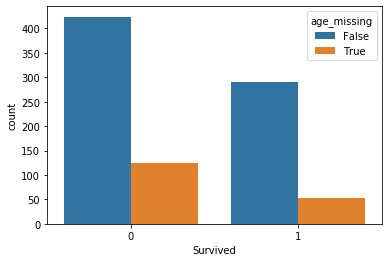

In [20]:
sns.countplot(x='Survived', data=data_train2, hue='age_missing')

In [21]:
pd.crosstab(data_train['Survived'], data_train2['age_missing'], margins=True, normalize='index')

age_missing,False,True
Survived,,
0,0.772313,0.227687
1,0.847953,0.152047
All,0.801347,0.198653


- We could further use __hypothesis testing__ to see whether the proportion of missingness in 'Age' is different by 'Survived'.

## 1.5 Exploratory Analysis

In [198]:
sns.set_style('darkgrid')

### 1.5.1 'Age'

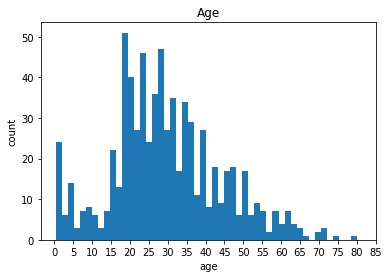

In [23]:
# Matplotlib - 'function method'
plt.hist(x='Age', data=data_train, bins=50)
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(np.arange(0,90,5))
plt.title('Age')
plt.show()

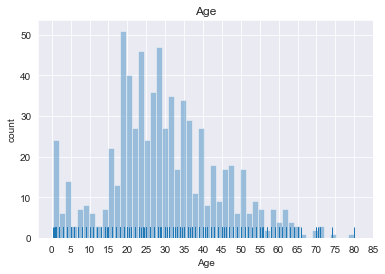

In [199]:
# Matplotlib - 'function method'
# Seaborn
sns.distplot(data_train['Age'].dropna(), bins=50, rug=True, kde=False)
plt.ylabel('count')
plt.xticks(np.arange(0, 90, 5))
plt.title('Age')
plt.show()

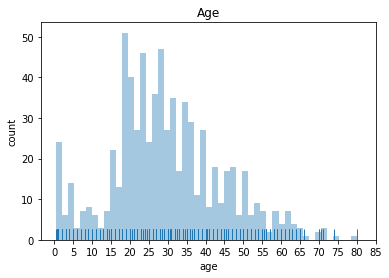

In [163]:
# Matplotlib - 'function method'
# Seaborn
# or alternatively
hist = sns.distplot(data_train['Age'].dropna(), bins=50, rug=True, kde=False)
hist.set(ylabel='count', title='Age', xticks=np.arange(0, 90, 5))
hist.set_xlabel('age')
plt.show()

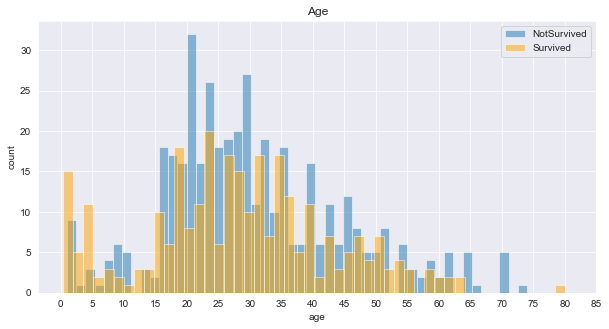

In [214]:
# Matplotlib - 'function method'
# 'Age' vs. 'Survived'
plt.figure(figsize=(10,5))
plt.hist(x='Age', data=data_train[data_train['Survived']==0], bins=50, alpha=0.5, label='NotSurvived')
plt.hist(x='Age', data=data_train[data_train['Survived']==1], bins=50, color='orange', alpha=0.5, label='Survived')
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(np.arange(0,90,5))
plt.title('Age')
plt.legend()
plt.show()

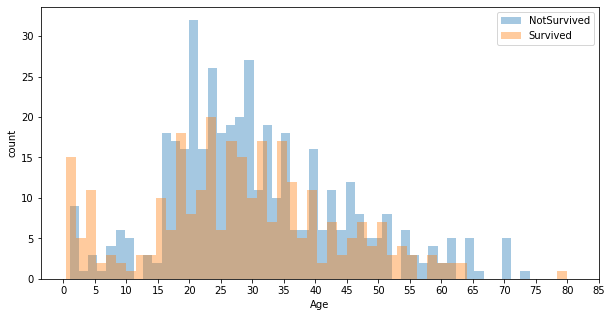

In [156]:
# Matplotlib - 'function method'
# Seaborn
# 'Age' vs. 'Survived'
plt.figure(figsize=(10,5))
sns.distplot(data_train['Age'][data_train['Survived']==0].dropna(), bins=50, kde=False, label='NotSurvived')
sns.distplot(data_train['Age'][data_train['Survived']==1].dropna(), bins=50, kde=False, label='Survived')
plt.ylabel('count')
plt.xticks(np.arange(0, 90, 5))
plt.legend()
plt.show()

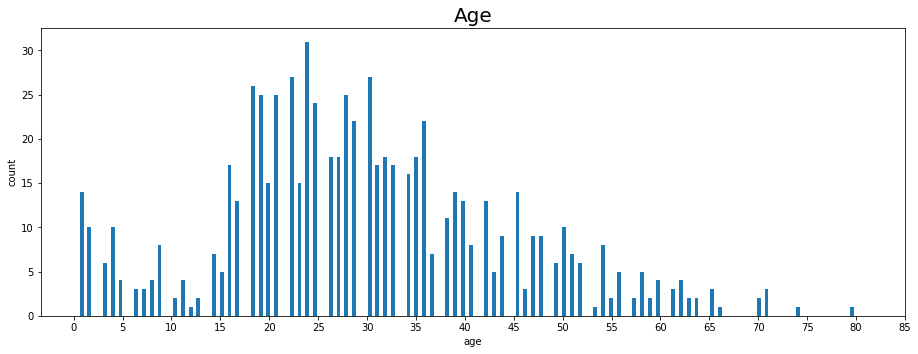

In [25]:
# Matplotlib - 'object oriented method'
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.hist(x='Age', data=data_train, bins=100, rwidth=0.5)
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_xticks(np.arange(0,90,5))
ax.set_title('Age', fontsize=20)
plt.show()

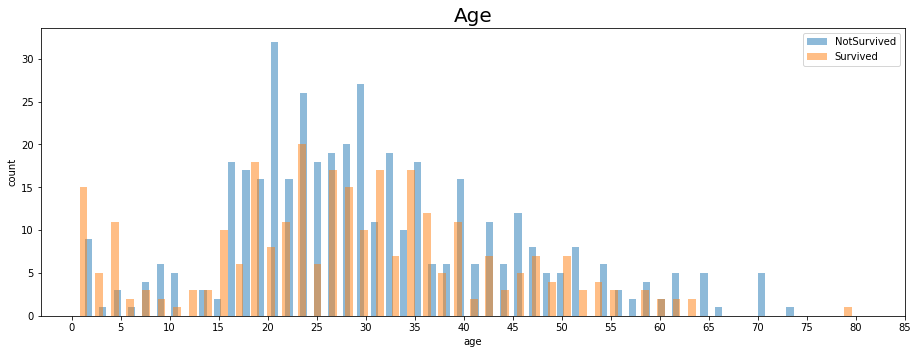

In [26]:
# Matplotlib - 'object oriented method'
# 'Age' vs. 'Survived'
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.hist(x='Age', data=data_train[data_train['Survived']==0], bins=50, rwidth=0.5, alpha=0.5, label='NotSurvived')
ax.hist(x='Age', data=data_train[data_train['Survived']==1], bins=50, rwidth=0.5, alpha=0.5, label='Survived')
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_xticks(np.arange(0,90,5))
ax.set_title('Age', fontsize=20)
ax.legend()
plt.show()

- It seems like people at the age from 15 to 45 had less chance of survival.

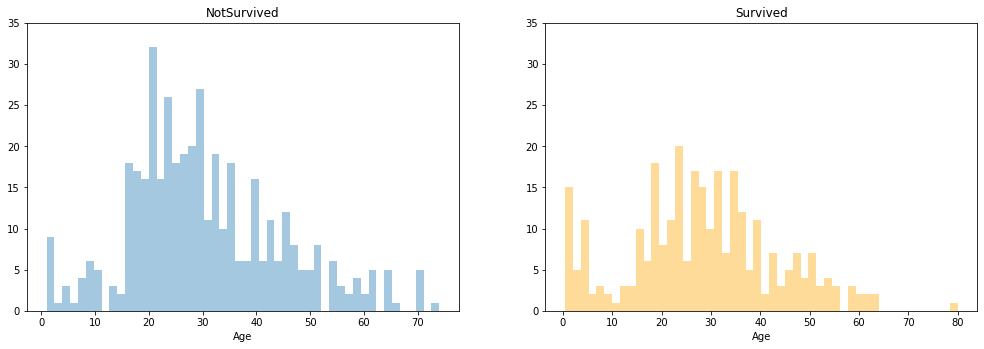

In [116]:
# Matplotlib - 'object oriented method'
# Seaborn
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
sns.distplot(data_train['Age'][data_train['Survived']==0].dropna(), bins=50, kde=False)
plt.title('NotSurvived')
plt.yticks(np.arange(0, 40, 5))
ax2 = fig.add_axes([1.2,0,1,1])
sns.distplot(data_train['Age'][data_train['Survived']==1].dropna(), bins=50, kde=False, color='orange')
plt.title('Survived')
plt.yticks(np.arange(0, 40, 5))
plt.show()

### 1.5.2 'SibSp' & 'Parch'

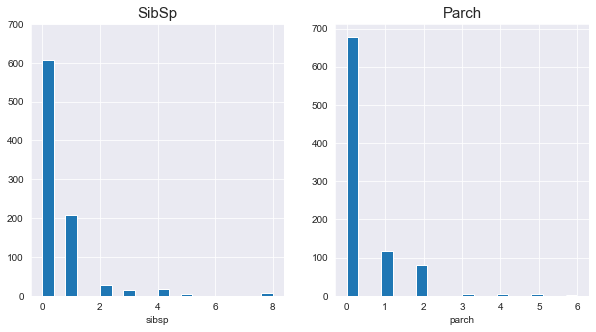

In [215]:
# Matplotlib - 'function method'
plt.figure(figsize=(10,5)) # same as 'fig = plt.figure(figsize=(10,5))'
plt.subplot(1, 2, 1)
plt.hist(x='SibSp', data=data_train, bins=20)
plt.yticks(np.arange(0, 800, 100))
plt.xlabel('sibsp')
plt.title('SibSp', fontsize=15)
plt.subplot(1, 2, 2)
plt.hist(x='Parch', data=data_train, bins=20)
plt.yticks(np.arange(0, 800, 100))
plt.xlabel('parch')
plt.title('Parch', fontsize=15)
plt.show()

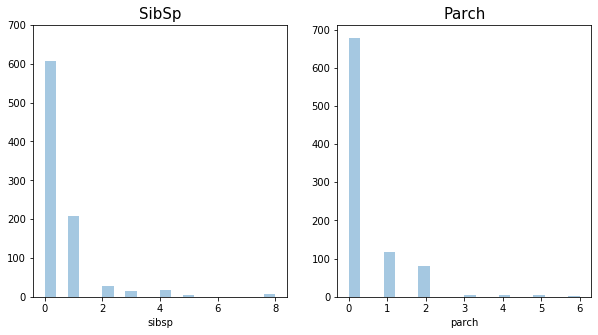

In [141]:
# Matplotlib - 'function method'
# Seaborn
plt.figure(figsize=(10,5)) # same as 'fig = plt.figure(figsize=(10,5))'
plt.subplot(1, 2, 1)
sns.distplot(data_train['SibSp'], bins=20, kde=False)
plt.yticks(np.arange(0, 800, 100))
plt.xlabel('sibsp')
plt.title('SibSp', fontsize=15)
plt.subplot(1, 2, 2)
sns.distplot(data_train['Parch'], bins=20, kde=False)
plt.yticks(np.arange(0, 800, 100))
plt.xlabel('parch')
plt.title('Parch', fontsize=15)
plt.show()

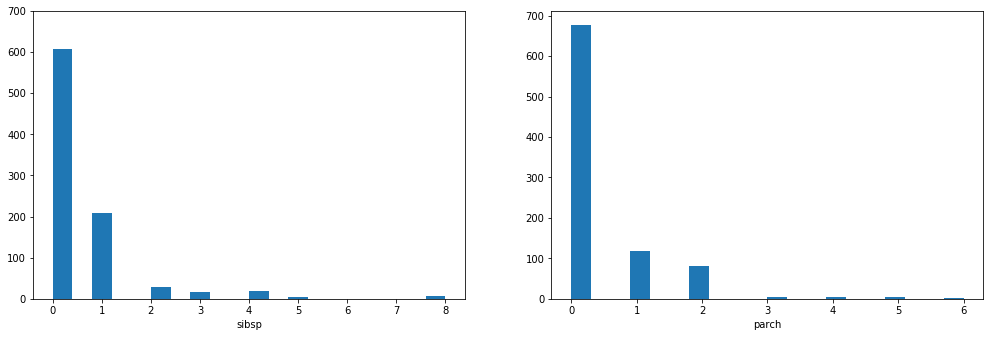

In [143]:
# Matplotlib - 'object oriented method' - 1
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.hist(x='SibSp', data=data_train, bins=20)
ax1.set_yticks(np.arange(0, 800, 100))
ax1.set_xlabel('sibsp')
ax2 = fig.add_axes([1.2,0,1,1])
ax2.hist(x='Parch', data=data_train, bins=20)
ax2.set_yticks(np.arange(0, 800, 100))
ax2.set_xlabel('parch')
plt.show()

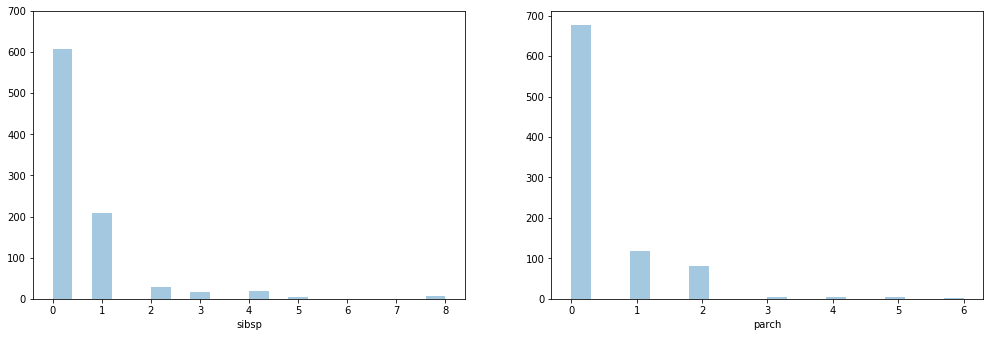

In [144]:
# Matplotlib - 'object oriented method' - 1
# Seaborn
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
sns.distplot(data_train['SibSp'], bins=20, kde=False)
ax1.set_yticks(np.arange(0, 800, 100))
ax1.set_xlabel('sibsp')
ax2 = fig.add_axes([1.2,0,1,1])
sns.distplot(data_train['Parch'], bins=20, kde=False)
ax2.set_yticks(np.arange(0, 800, 100))
ax2.set_xlabel('parch')
plt.show()

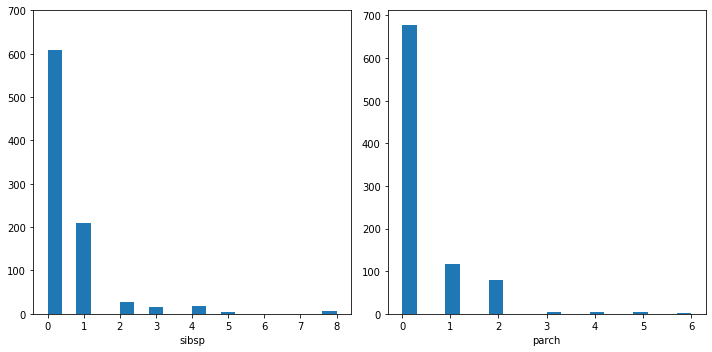

In [145]:
# Matplotlib - 'object oriented method' - 2
fig, ax = plt.subplots(1, 2, figsize=(10,5)) # subplot+'s'
ax[0].hist(x='SibSp', data=data_train, bins=20)
ax[0].set_yticks(np.arange(0, 800, 100))
ax[0].set_xlabel('sibsp')
ax[1].hist(x='Parch', data=data_train, bins=20)
ax[1].set_yticks(np.arange(0, 800, 100))
ax[1].set_xlabel('parch')
plt.tight_layout()
plt.show()

- A large proportion of people have 0 relatives, for which we can consider either do a transformation or make this a binary variable.

### 1.5.3 'Fare'

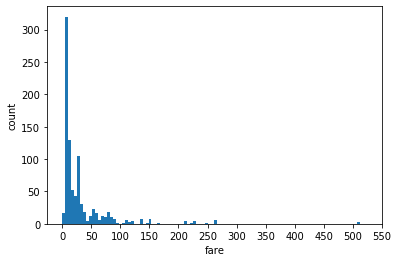

In [41]:
# Matplotlib - 'function method'
plt.hist(x='Fare', data=data_train, bins=100)
plt.xlabel('fare')
plt.ylabel('count')
plt.xticks(np.arange(0, 600, 50))
plt.show()

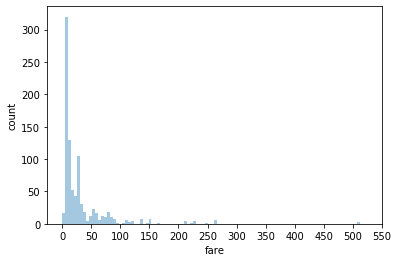

In [150]:
# Matplotlib - 'function method'
# Seaborn
sns.distplot(data_train['Fare'], bins=100, kde=False)
plt.xlabel('fare')
plt.ylabel('count')
plt.xticks(np.arange(0, 600, 50))
plt.show()

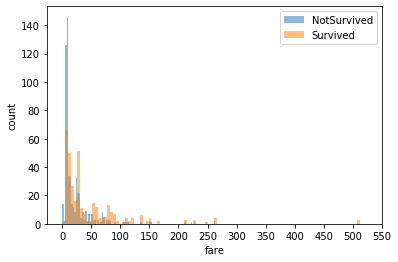

In [44]:
# Matplotlib - 'function method'
# 'Fare' vs. 'Survived'
plt.hist(x='Fare', data=data_train[data_train['Survived']==0], bins=100, alpha=0.5, label='NotSurvived')
plt.hist(x='Fare', data=data_train[data_train['Survived']==1], bins=100, alpha=0.5, label='Survived')
plt.xlabel('fare')
plt.ylabel('count')
plt.xticks(np.arange(0, 600, 50))
plt.legend()
plt.show()

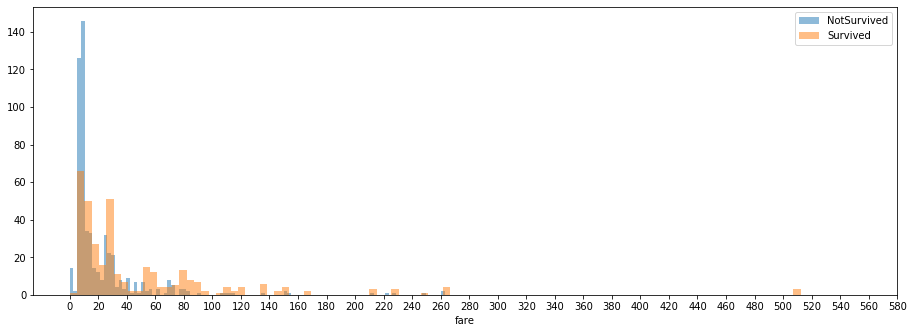

In [57]:
# Matplotlib - 'object oriented method'
# 'Fare' vs. 'Survived'
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.hist(x='Fare', data=data_train[data_train['Survived']==0], bins=100, alpha=0.5, label='NotSurvived')
ax.hist(x='Fare', data=data_train[data_train['Survived']==1], bins=100, alpha=0.5, label='Survived')
ax.set_xlabel('fare')
ax.set_xticks(np.arange(0,600,20))
ax.legend()
plt.show()

- It seems people paid with high fare had more chance of survival.
- There are a few high numbers, which could be outliers.
- Since the distribution is skewed, we can consider transformation.

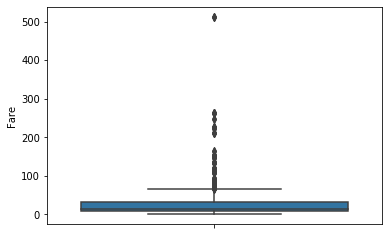

In [24]:
sns.boxplot(y='Fare', data=data_train)
plt.show()

### 1.5.4 'Survived'

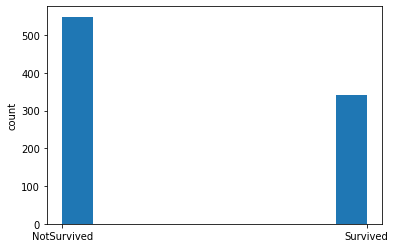

In [30]:
# Matplotlib - 'function method'
plt.hist(x='Survived', data=data_train, rwidth=1)
plt.ylabel('count')
plt.xticks([0,1], ['NotSurvived', 'Survived'])
plt.show()

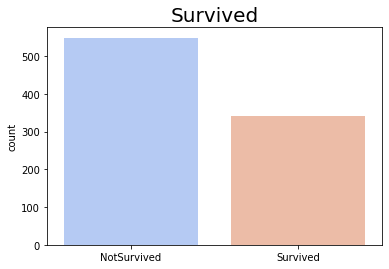

In [31]:
# Seaborn
barp = sns.countplot(x='Survived', data=data_train, palette='coolwarm') #.set_title('Survived')
barp.set_title('Survived', fontsize=20)
barp.set(xticklabels=['NotSurvived', 'Survived'], xlabel='')
plt.show()

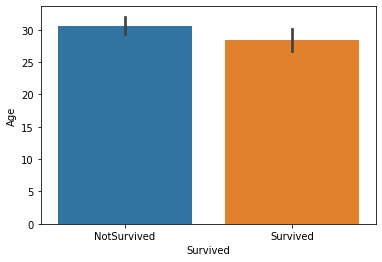

In [164]:
# Seaborn
# 'Age' vs. 'Survived'
barp = sns.barplot(x='Survived', y='Age', data=data_train)
#barp.set(xticklabels=['NotSurvived', 'Survived'], xlabel='')
barp.set_xticklabels(['NotSurvived', 'Survived'])
plt.show()

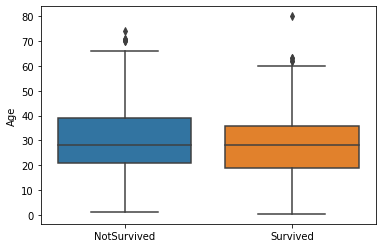

In [174]:
# Seaborn
# 'Age' vs. 'Survived'
boxp = sns.boxplot(x='Survived', y='Age', data=data_train)
boxp.set_xticklabels(['NotSurvived', 'Survived'])
boxp.set_xlabel('')
plt.show()

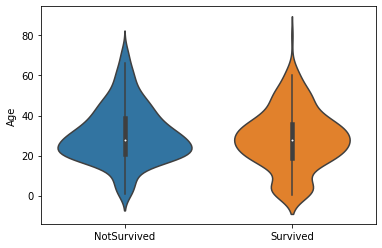

In [182]:
# Seaborn
# 'Age' vs. 'Survived'
viop = sns.violinplot(x='Survived', y='Age', data=data_train)
viop.set_xticklabels(['NotSurvived', 'Survived'])
viop.set_xlabel('')
plt.show()

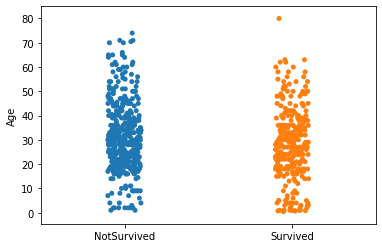

In [185]:
# Seaborn
# 'Age' vs. 'Survived'
strp = sns.stripplot(x='Survived', y='Age', data=data_train, jitter=True)
strp.set_xticklabels(['NotSurvived', 'Survived'])
strp.set_xlabel('')
plt.show()

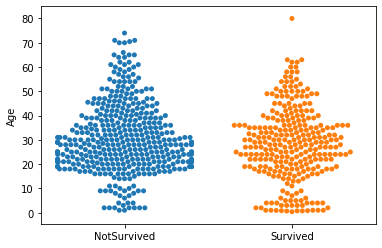

In [187]:
# Seaborn
# 'Age' vs. 'Survived'
swmp = sns.swarmplot(x='Survived', y='Age', data=data_train)
swmp.set_xticklabels(['NotSurvived', 'Survived'])
swmp.set_xlabel('')
plt.show()

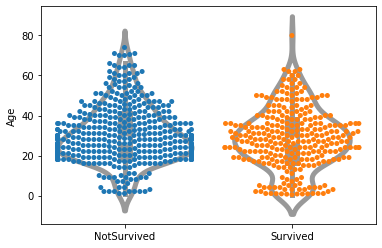

In [192]:
# Seaborn
# 'Age' vs. 'Survived'
viop = sns.violinplot(x='Survived', y='Age', data=data_train, color='w', linewidth=5)
swmp = sns.swarmplot(x='Survived', y='Age', data=data_train)
swmp.set_xticklabels(['NotSurvived', 'Survived'])
swmp.set_xlabel('')
plt.show()

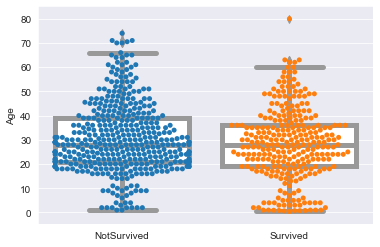

In [216]:
# Seaborn
# 'Age' vs. 'Survived'
boxp = sns.boxplot(x='Survived', y='Age', data=data_train, color='w', linewidth=5)
swmp = sns.swarmplot(x='Survived', y='Age', data=data_train)
swmp.set_xticklabels(['NotSurvived', 'Survived'])
swmp.set_xlabel('')
plt.show()

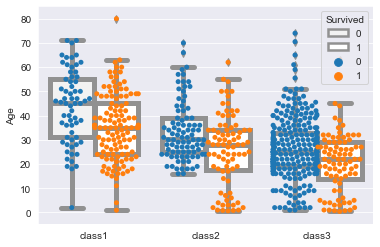

In [322]:
# Seaborn
# 'Age' vs. 'Class' vs. Survived'
boxp = sns.boxplot(x='Pclass', y='Age', data=data_train, color='w', linewidth=5, hue='Survived')
swmp = sns.swarmplot(x='Pclass', y='Age', data=data_train, hue='Survived', dodge=True)
swmp.set_xticklabels(['class1', 'class2', 'class3'])
swmp.set_xlabel('')
plt.show()

In [ ]:
# alternatively
# sns.factorplot(,,, kind='')

### 1.5.5 'Pclass'

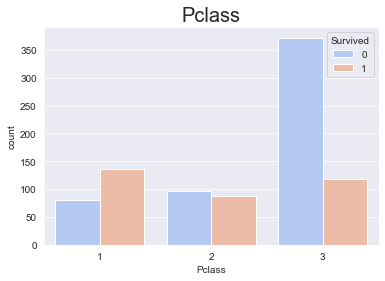

In [200]:
# Seaborn
# 'Pclass' vs. 'Survived'
barp = sns.countplot(x='Pclass', data=data_train, hue='Survived', palette='coolwarm')
barp.set_title('Pclass', fontsize=20)
plt.show()

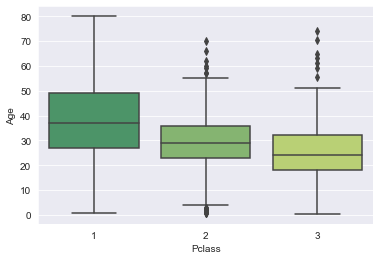

In [205]:
# Seaborn
# 'Pclass' vs. 'Age'
boxp = sns.boxplot(x='Pclass', y='Age', data=data_train, palette='summer')

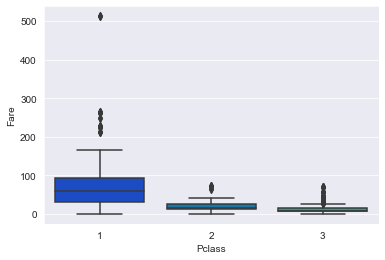

In [206]:
# Seaborn
# 'Pclass' vs. 'Fare'
boxp = sns.boxplot(x='Pclass', y='Fare', data=data_train, palette='winter')

### 1.5.6 'Sex'

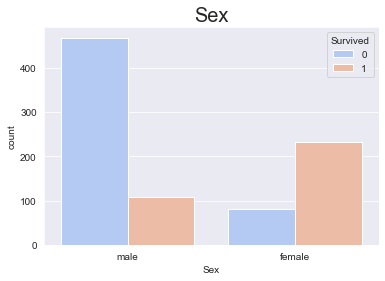

In [207]:
# Seaborn
# 'Sex' vs. 'Survived'
barp = sns.countplot(x='Sex', data=data_train, hue='Survived', palette='coolwarm')
barp.set_title('Sex', fontsize=20)
plt.show()

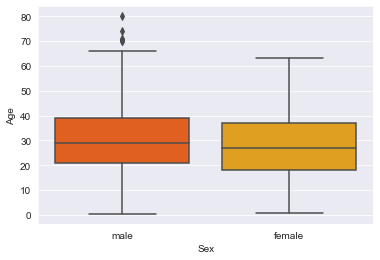

In [211]:
# Seaborn
# 'Sex' vs. 'Age'
boxp = sns.boxplot(x='Sex', y='Age', data=data_train, palette='autumn')

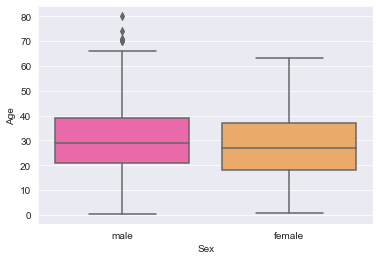

In [212]:
# Seaborn
# 'Sex' vs. 'Fare'
boxp = sns.boxplot(x='Sex', y='Age', data=data_train, palette='spring')

### 1.5.7 'Embarked'

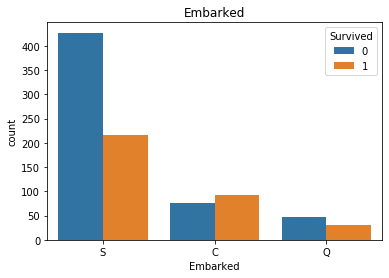

In [28]:
# Seaborn
# 'Embarked' vs. 'Survived'
barp = sns.countplot(x='Embarked', data=data_train, hue='Survived')
barp.set_title('Embarked')
plt.show()

- Most people embarked from 'S'.
- Those who embarked from 'C' have a better chance of survival.

### 1.5.8 Comprehensive

In [294]:
data_train[['Age', 'SibSp', 'Parch', 'Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


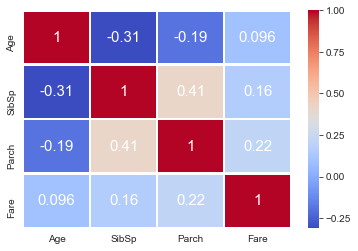

In [293]:
# Seaborn
sns.heatmap(data_train[['Age', 'SibSp', 'Parch', 'Fare']].corr(),
           annot=True, annot_kws={'size': 15, 'color':'w'}, cmap='coolwarm', linewidths=1.5, linecolor='w')

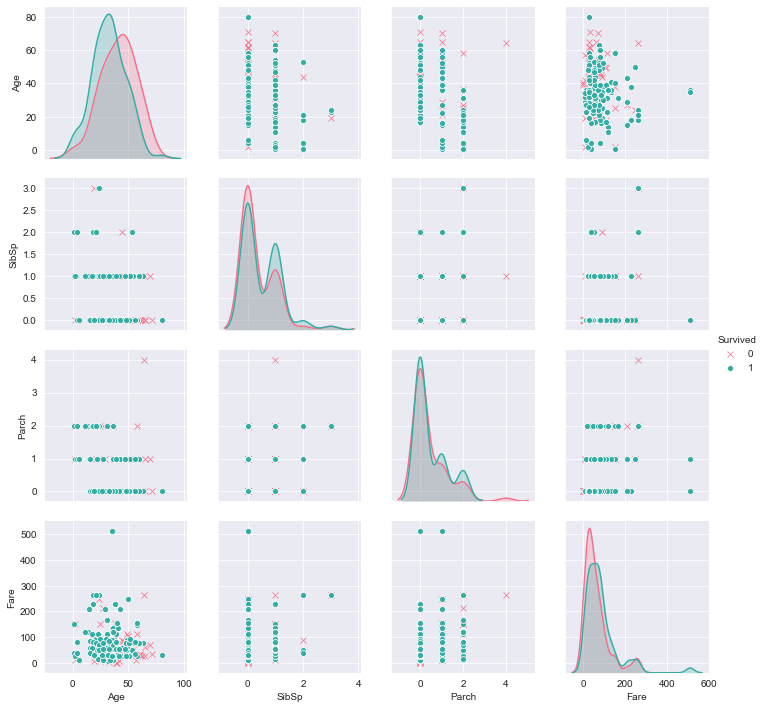

In [265]:
# Seaborn
sns.pairplot(data=data_train.dropna(),
             x_vars=['Age', 'SibSp', 'Parch', 'Fare'],
             y_vars=['Age', 'SibSp', 'Parch', 'Fare'],
             hue='Survived', palette='husl', markers=['x', 'o'])

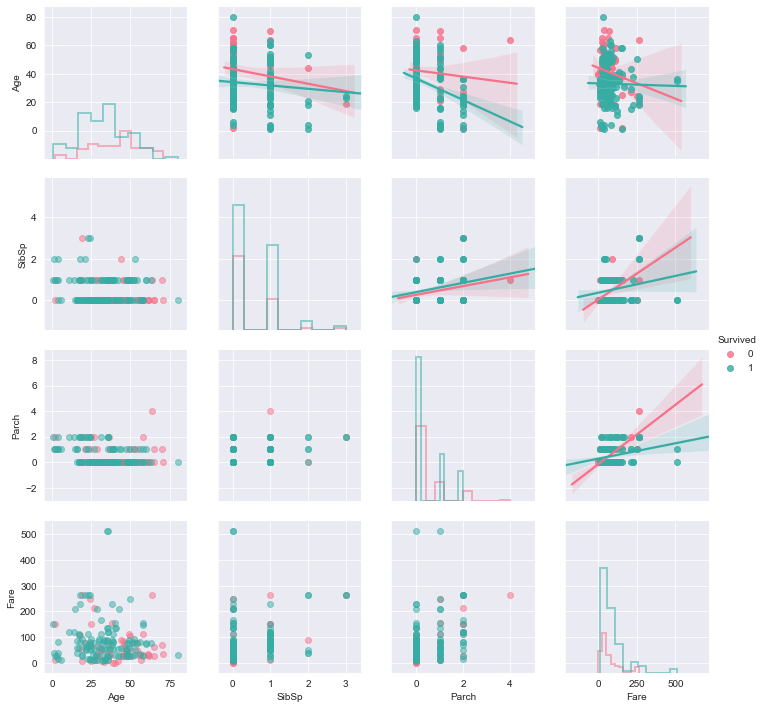

In [287]:
# Seaborn
# Grids
g = sns.PairGrid(data=data_train.dropna(),
             x_vars=['Age', 'SibSp', 'Parch', 'Fare'],
             y_vars=['Age', 'SibSp', 'Parch', 'Fare'],
             hue='Survived', palette='husl')
g.map_diag(plt.hist, histtype='step', alpha=0.5, linewidth=2)
g.map_lower(plt.scatter, alpha=0.5)
g.map_upper(sns.regplot)
g.add_legend()

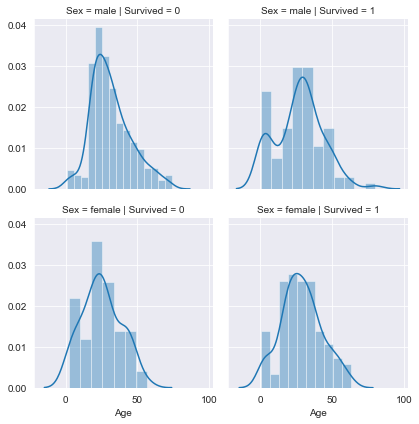

In [289]:
# Seaborn
# Facet Grid
g = sns.FacetGrid(data=data_train, col='Survived', row='Sex')
g.map(sns.distplot, 'Age')

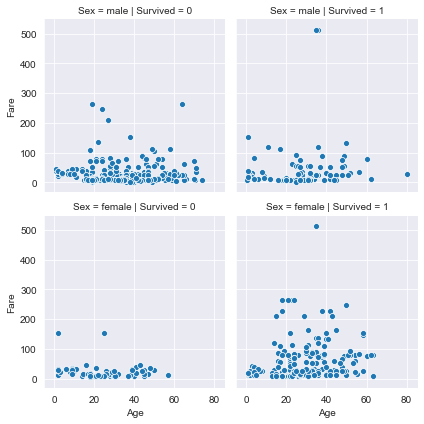

In [292]:
# Seaborn
# Facet Grid
g = sns.FacetGrid(data=data_train, col='Survived', row='Sex')
g.map(sns.scatterplot, 'Age', 'Fare')

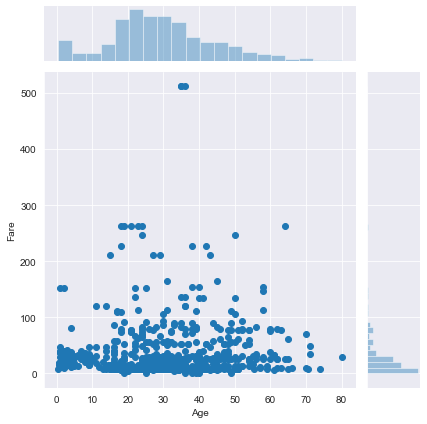

In [300]:
# Seaborn
# 'Age' vs. 'Fare'
sns.jointplot(x='Age', y='Fare', data=data_train)

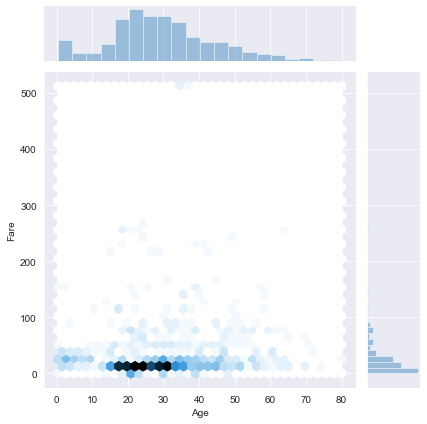

In [301]:
# Seaborn
# 'Age' vs. 'Fare'
sns.jointplot(x='Age', y='Fare', data=data_train, kind='hex')

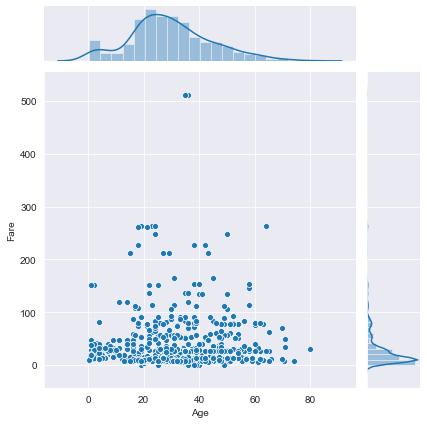

In [306]:
# Seaborn
# 'Age' vs. 'Fare'
g = sns.JointGrid(x='Age', y='Fare', data=data_train)
g.plot(sns.scatterplot, sns.distplot)